In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [68]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [52]:
def analyze_corr(df):
# Рисуем график
    plt.scatter(df.mortality, df.hardness)
    
# Считаем корреляцию
    pearson = df[['mortality', 'hardness']].corr()
    print(f'Коэффициент корреляции Пирсона: \n {pearson}')
    
    print()
    
    spearman = df[['mortality', 'hardness']].corr(method='spearman')
    print(f'Коэффициент корреляции Спирмана: \n {spearman}')
    
def regress_model(df):
# Построим модель регрессии
    X = df[['hardness']].values
    Y = df['mortality'].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print('Parameters: ', results.params)
    
# Выведем коэффициент детерминации:
    print('R2: ', results.rsquared)
    
# Выведем график остатков:
    plt.scatter(df.mortality, df.hardness)
    plt.plot( results.fittedvalues, df['hardness'])

Коэффициент корреляции Пирсона: 
            mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000

Коэффициент корреляции Спирмана: 
            mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


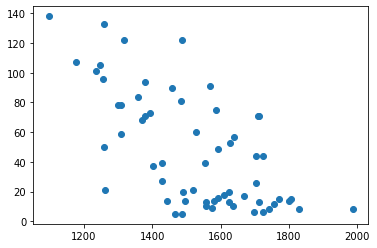

In [55]:
analyze_corr(df)

Parameters:  [1676.3556007    -3.22609161]
R2:  0.42882671931249716


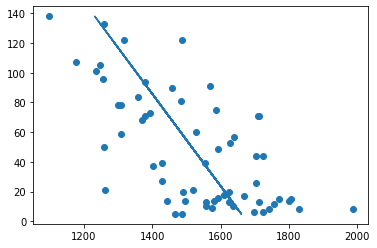

In [56]:
regress_model(df)


In [67]:
# Разделим на север и юг: 
south = df[df.location == 'South']
north = df[df.location == 'North']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


Коэффициент корреляции Пирсона: 
            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

Коэффициент корреляции Спирмана: 
            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


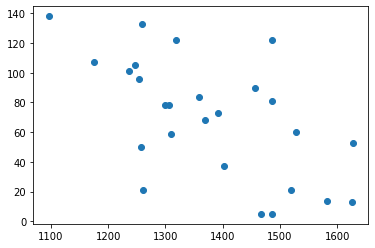

In [69]:
analyze_corr(south)

Parameters:  [1522.81504854   -2.09271845]
R2:  0.3625885624364602


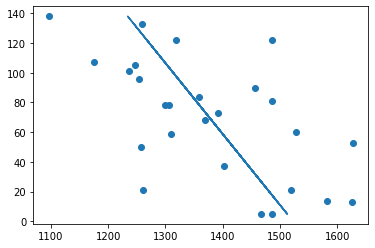

In [70]:
regress_model(south)

Коэффициент корреляции Пирсона: 
            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

Коэффициент корреляции Спирмана: 
            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


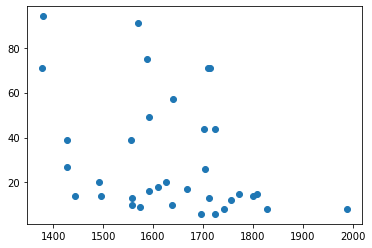

In [72]:
analyze_corr(north)

Parameters:  [1692.31280143   -1.93134215]
R2:  0.13586436642071753


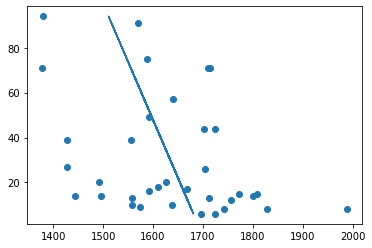

In [73]:
regress_model(north)